In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
def prepare_data(data):
    return [record['values'] for record in data['series']]

def make_indices(data):
    return [record['time'] for record in data['series']]

def make_columns(data, asset):
    return [f'{asset}_{col_name}' for col_name in data['metrics']]

def get_coinmetrics_data(asset,metrics_list):
    metrics = ','.join(metrics_list)
    response = requests.get(f'https://community-api.coinmetrics.io/v2/assets/{asset}/metricdata?',
                            params={'metrics':metrics})
    try:
        data = response.json()['metricData']
    except:
        print(asset,response)
        return response
    return data

# def build_coinmetrics_dataframe(asset_list, metrics_list):
#     coin_data = pd.DataFrame()
#     for asset in asset_list:
#         data = get_coinmetrics_data(asset, metrics_list)
#         new_df = pd.DataFrame(data=prepare_data(data),
#                               index=pd.to_datetime(make_indices(data)),
#                               columns=make_columns(data,asset))
#         if coin_data.empty:
#             coin_data = new_df
#         else:
#             coin_data = pd.concat([coin_data, new_df], axis=1, join='inner')
#     return coin_data

def build_coinmetrics_dataframe(asset_list, metrics_list):
    coin_data = {}
    for asset in asset_list:
        data = get_coinmetrics_data(asset, metrics_list)
#         try:
        new_df = pd.DataFrame(data=prepare_data(data),
                                  index=pd.to_datetime(make_indices(data)),
                                  columns=make_columns(data,asset), dtype='float64')
#         except:
#             new_df = data
#             print(data)
        new_df.to_csv(f'{asset}_data.csv')
        coin_data[asset] = new_df
    return coin_data

In [8]:
# + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + +
# A big thank you to coinmetrics for aggregating, maintaining, and hosting publicly-available cryptocurrency data +
# + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + +

# full list of assets available at https://community-api.coinmetrics.io/v2/assets
asset_list = ['btc', 'eth', 'ltc', 'doge']

# full list of metrics plus descriptions available at https://community-api.coinmetrics.io/v2/metric_info
metrics_list = [
    'PriceUSD', 
    'AdrActCnt',
    'BlkCnt',
    'BlkSizeByte',
    'BlkSizeMeanByte',
    'DiffMean',
    'FeeMeanNtv',
    'FeeMedNtv',
    'FeeTotNtv',
    'TxCnt', 
    'TxTfr',
    'TxTfrValMeanNtv',
    'TxTfrValMedNtv',
    'TxTfrValNtv',
]

#  I wasn't sure if I was giving the system too much information by including the USD value of fees
#  I was hoping to gain a measure of core network size with the count of active addresses,
#  measure hype and panic by using fee data, and 

crypto_data = build_coinmetrics_dataframe(asset_list, metrics_list)

# crypto_data

In [29]:
crypto_data['btc'].iloc[728:-1,:].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3118 entries, 2011-01-01 to 2019-07-15
Data columns (total 14 columns):
btc_PriceUSD           3118 non-null float64
btc_AdrActCnt          3118 non-null float64
btc_BlkCnt             3118 non-null float64
btc_BlkSizeByte        3118 non-null float64
btc_BlkSizeMeanByte    3118 non-null float64
btc_DiffMean           3118 non-null float64
btc_FeeMeanNtv         3118 non-null float64
btc_FeeMedNtv          3118 non-null float64
btc_FeeTotNtv          3118 non-null float64
btc_TxCnt              3118 non-null float64
btc_TxTfr              3118 non-null float64
btc_TxTfrValMeanNtv    3118 non-null float64
btc_TxTfrValMedNtv     3118 non-null float64
btc_TxTfrValNtv        3118 non-null float64
dtypes: float64(14)
memory usage: 365.4 KB


In [30]:
crypto_data['ltc'].iloc[817:-1,:].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2022 entries, 2014-01-01 to 2019-07-15
Data columns (total 14 columns):
ltc_PriceUSD           2022 non-null float64
ltc_AdrActCnt          2022 non-null float64
ltc_BlkCnt             2022 non-null float64
ltc_BlkSizeByte        2022 non-null float64
ltc_BlkSizeMeanByte    2022 non-null float64
ltc_DiffMean           2022 non-null float64
ltc_FeeMeanNtv         2022 non-null float64
ltc_FeeMedNtv          2022 non-null float64
ltc_FeeTotNtv          2022 non-null float64
ltc_TxCnt              2022 non-null float64
ltc_TxTfr              2022 non-null float64
ltc_TxTfrValMeanNtv    2022 non-null float64
ltc_TxTfrValMedNtv     2022 non-null float64
ltc_TxTfrValNtv        2022 non-null float64
dtypes: float64(14)
memory usage: 237.0 KB


In [35]:
crypto_data['eth'].iloc[155:-1,:].info()
# crypto_data[asset].iloc[cutoffs[asset]:-1,:]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1292 entries, 2016-01-01 to 2019-07-15
Data columns (total 14 columns):
eth_PriceUSD           1292 non-null float64
eth_AdrActCnt          1292 non-null float64
eth_BlkCnt             1292 non-null float64
eth_BlkSizeByte        1292 non-null float64
eth_BlkSizeMeanByte    1292 non-null float64
eth_DiffMean           1292 non-null float64
eth_FeeMeanNtv         1292 non-null float64
eth_FeeMedNtv          1292 non-null float64
eth_FeeTotNtv          1292 non-null float64
eth_TxCnt              1292 non-null float64
eth_TxTfr              1292 non-null float64
eth_TxTfrValMeanNtv    1292 non-null float64
eth_TxTfrValMedNtv     1292 non-null float64
eth_TxTfrValNtv        1292 non-null float64
dtypes: float64(14)
memory usage: 151.4 KB


In [36]:
print(crypto_data['doge'].iloc[389:-1,:].info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1657 entries, 2015-01-01 to 2019-07-15
Data columns (total 14 columns):
doge_PriceUSD           1657 non-null float64
doge_AdrActCnt          1657 non-null float64
doge_BlkCnt             1657 non-null float64
doge_BlkSizeByte        1657 non-null float64
doge_BlkSizeMeanByte    1657 non-null float64
doge_DiffMean           1657 non-null float64
doge_FeeMeanNtv         1657 non-null float64
doge_FeeMedNtv          1657 non-null float64
doge_FeeTotNtv          1657 non-null float64
doge_TxCnt              1657 non-null float64
doge_TxTfr              1657 non-null float64
doge_TxTfrValMeanNtv    1657 non-null float64
doge_TxTfrValMedNtv     1657 non-null float64
doge_TxTfrValNtv        1657 non-null float64
dtypes: float64(14)
memory usage: 194.2 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1657 entries, 2015-01-01 to 2019-07-15
Data columns (total 14 columns):
doge_PriceUSD           1657 non-null float64
doge_AdrActC

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3118 entries, 2011-01-01 to 2019-07-15
Data columns (total 14 columns):
btc_PriceUSD           3118 non-null float64
btc_AdrActCnt          3118 non-null float64
btc_BlkCnt             3118 non-null float64
btc_BlkSizeByte        3118 non-null float64
btc_BlkSizeMeanByte    3118 non-null float64
btc_DiffMean           3118 non-null float64
btc_FeeMeanNtv         3118 non-null float64
btc_FeeMedNtv          3118 non-null float64
btc_FeeTotNtv          3118 non-null float64
btc_TxCnt              3118 non-null float64
btc_TxTfr              3118 non-null float64
btc_TxTfrValMeanNtv    3118 non-null float64
btc_TxTfrValMedNtv     3118 non-null float64
btc_TxTfrValNtv        3118 non-null float64
dtypes: float64(14)
memory usage: 365.4 KB
None

missing values? False


Coefficients: 
 [ 1.24467689e-03  1.64874385e+00 -1.34448969e-06 -6.44932396e-04
  4.23172247e-09 -2.41386868e+04 -2.86486113e+05  5.10453661e-01
 -3.84733827e-03  4.461647

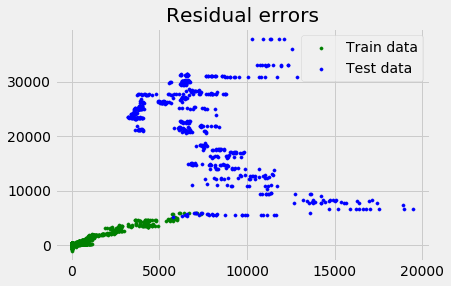

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


cutoffs = {'btc':728, 'eth':155, 'ltc':817, 'doge':389}




for asset in asset_list[0:1]: ############################# just for BTC for now
    
    df = crypto_data[asset].iloc[cutoffs[asset]:-1,:] # trim dataframe
    
    print(df.info())
    missing = df.isnull().values.any()
    print(f'\nmissing values? {missing}\n\n')

    y = df.iloc[:,0]
    X = df.iloc[:,1:] # maybe put something that defines the size of the window
    
    tt_cutoff = 2500
    y_train = y.iloc[:tt_cutoff]
    X_train = X.iloc[:tt_cutoff,:]
    y_test = y.iloc[tt_cutoff:]
    X_test = X.iloc[tt_cutoff:,:]
    
    
    my_model = linear_model.LinearRegression()
    
    
    # train the model using the training sets

    my_model.fit(X_train, y_train)



    # regression coefficients

    print('Coefficients: \n', my_model.coef_)



    # variance score: 1 means perfect prediction

    print('Variance score: {}'.format(my_model.score(X_test, y_test)))
    
    nfolds = 5 # or maybe do this a few months at a time, i.e. fold_size = 180 #days
    
    
    
    # plot for residual error

    ## setting plot style

    plt.style.use('fivethirtyeight')



#     ## plotting residual errors in training data

#     plt.scatter(my_model.predict(X_train), my_model.predict(X_train) - y_train,

#                 color = "green", s = 10, label = 'Train data')



#     ## plotting residual errors in test data

#     plt.scatter(my_model.predict(X_test), my_model.predict(X_test) - y_test,

#                 color = "blue", s = 10, label = 'Test data')


    ## plotting residual errors in training data

    plt.scatter(y_train, my_model.predict(X_train),# - y_train,

                color = "green", s = 10, label = 'Train data')



    ## plotting residual errors in test data

    plt.scatter(y_test, my_model.predict(X_test),# - y_test,

                color = "blue", s = 10, label = 'Test data')
    
    ## plotting line for zero residual error

#     plt.hlines(y = 0, xmin = -30_000, xmax = 50, linewidth = 2)



    ## plotting legend

    plt.legend(loc = 'best')



    ## plot title

    plt.title("Residual errors")



    ## function to show plot

    plt.show()


In [63]:
X.iloc[tt_cutoff-5:tt_cutoff+5,:]

,btc_AdrActCnt,btc_BlkCnt,btc_BlkSizeByte,btc_BlkSizeMeanByte,btc_DiffMean,btc_FeeMeanNtv,btc_FeeMedNtv,btc_FeeTotNtv,btc_TxCnt,btc_TxTfr,btc_TxTfrValMeanNtv,btc_TxTfrValMedNtv,btc_TxTfrValNtv
2017-10-31,827896.0,138.0,143278210.0,1.038248e+06,1.452840e+12,0.000850,0.000545,238.224687,280319.0,712314.0,2.443574,0.015900,1.740592e+06
2017-11-01,961473.0,156.0,162749613.0,1.043267e+06,1.452840e+12,0.000836,0.000542,293.719746,351487.0,861073.0,2.165974,0.015300,1.865062e+06
2017-11-02,916882.0,150.0,155648761.0,1.037658e+06,1.452840e+12,0.000814,0.000542,278.183012,341608.0,811413.0,2.381480,0.018305,1.932364e+06
2017-11-03,820113.0,119.0,124529905.0,1.046470e+06,1.452840e+12,0.000994,0.000594,276.152295,277903.0,762943.0,2.061618,0.013920,1.572897e+06
2017-11-04,800708.0,130.0,133604169.0,1.027724e+06,1.452840e+12,0.000911,0.000632,264.942788,290835.0,673868.0,1.603844,0.012889,1.080779e+06
2017-11-05,805781.0,141.0,146999026.0,1.042546e+06,1.452840e+12,0.000780,0.000543,196.393381,251752.0,636650.0,1.692930,0.010371,1.077804e+06
2017-11-06,831790.0,133.0,138945058.0,1.044700e+06,1.452840e+12,0.000910,0.000634,248.539446,273071.0,703774.0,2.013960,0.013680,1.417372e+06
2017-11-07,937089.0,156.0,160145758.0,1.026575e+06,1.452840e+12,0.000864,0.000592,287.546336,332632.0,828880.0,2.259742,0.012250,1.873055e+06
2017-11-08,871573.0,144.0,147854455.0,1.026767e+06,1.452840e+12,0.000887,0.000638,269.053335,303382.0,761503.0,2.530801,0.014709,1.927212e+06
2017-11-09,948030.0,153.0,156766602.0,1.024618e+06,1.452840e+12,0.001068,0.000683,362.664500,339565.0,829963.0,2.372653,0.014884,1.969214e+06


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


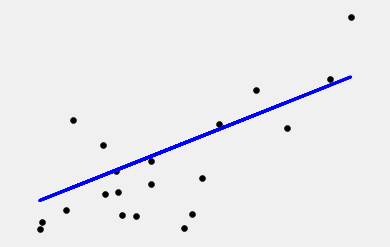

In [61]:
    
    
    X = 0
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [21]:
crypto_data['doge'].iloc[389:,:].tail()

,doge_PriceUSD,doge_AdrActCnt,doge_BlkCnt,doge_BlkSizeByte,doge_BlkSizeMeanByte,doge_DiffMean,doge_FeeMeanNtv,doge_FeeMedNtv,doge_FeeTotNtv,doge_TxCnt,doge_TxTfr,doge_TxTfrValMeanNtv,doge_TxTfrValMedNtv,doge_TxTfrValNtv
2019-07-12,0.003261,89056.0,1387.0,18201165.0,13122.685652,6.112753e+06,1.465421,1.0,39076.921844,26666.0,79708.0,118328.300380,87.000000,9.431712e+09
2019-07-13,0.003237,65339.0,1382.0,13401619.0,9697.264110,6.292994e+06,1.216722,1.0,31037.354776,25509.0,72439.0,124558.623715,91.970000,9.022902e+09
2019-07-14,0.002928,78613.0,1393.0,15645888.0,11231.793252,6.478210e+06,1.272039,1.0,36830.626627,28954.0,86434.0,114898.921120,73.037025,9.931173e+09
2019-07-15,0.003079,76187.0,1385.0,16047114.0,11586.363899,6.183866e+06,1.340508,1.0,36046.263094,26890.0,84061.0,111768.367678,84.119379,9.395361e+09
2019-07-16,0.002774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
crypto_data['btc'].corr()

,btc_PriceUSD,btc_AdrActCnt,btc_BlkCnt,btc_BlkSizeByte,btc_BlkSizeMeanByte,btc_DiffMean,btc_FeeMeanNtv,btc_FeeMedNtv,btc_FeeTotNtv,btc_TxCnt,btc_TxTfr,btc_TxTfrValMeanNtv,btc_TxTfrValMedNtv,btc_TxTfrValNtv
btc_PriceUSD,1.000000,0.754484,-0.110327,0.680262,0.665464,0.728154,-0.026953,0.208003,0.516840,0.642759,0.656805,-0.179898,-0.090710,-0.045643
btc_AdrActCnt,0.754484,1.000000,0.007422,0.981887,0.970061,0.611531,-0.065620,-0.032032,0.636468,0.967617,0.955888,-0.144887,-0.091368,0.150963
btc_BlkCnt,-0.110327,0.007422,1.000000,0.013310,-0.045303,-0.051249,-0.061445,-0.084827,0.030968,0.007801,0.009482,-0.110535,-0.155438,0.046186
btc_BlkSizeByte,0.680262,0.981887,0.013310,1.000000,0.988116,0.626902,-0.073911,-0.036963,0.555093,0.981684,0.965449,-0.154741,-0.097929,0.162496
btc_BlkSizeMeanByte,0.665464,0.970061,-0.045303,0.988116,1.000000,0.645761,-0.073785,-0.036976,0.536685,0.974318,0.956608,-0.153284,-0.096952,0.154963
btc_DiffMean,0.728154,0.611531,-0.051249,0.626902,0.645761,1.000000,-0.042524,-0.024369,0.118731,0.620575,0.577650,-0.069682,-0.043038,-0.052586
btc_FeeMeanNtv,-0.026953,-0.065620,-0.061445,-0.073911,-0.073785,-0.042524,1.000000,0.751393,0.006880,-0.071476,-0.071384,0.251697,0.226252,-0.028804
btc_FeeMedNtv,0.208003,-0.032032,-0.084827,-0.036963,-0.036976,-0.024369,0.751393,1.000000,0.007182,-0.035208,-0.035047,0.270447,0.290271,-0.016165
btc_FeeTotNtv,0.516840,0.636468,0.030968,0.555093,0.536685,0.118731,0.006880,0.007182,1.000000,0.577209,0.593333,-0.073876,-0.047471,0.133006
btc_TxCnt,0.642759,0.967617,0.007801,0.981684,0.974318,0.620575,-0.071476,-0.035208,0.577209,1.000000,0.964761,-0.151690,-0.096216,0.172740


<Figure size 432x288 with 0 Axes>

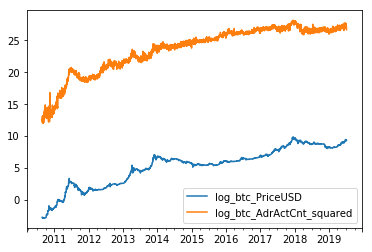

In [166]:
plt.figure();
temp = crypto_data['btc'][['btc_PriceUSD','btc_AdrActCnt']].iloc[600:,:]
temp['log_btc_AdrActCnt_squared'] = temp['btc_AdrActCnt'].apply(lambda x: math.log(math.pow(x,2)))
temp['btc_AdrActCnt_squared'] = temp['btc_AdrActCnt'].apply(lambda x: math.pow(x,2))
temp['log_btc_PriceUSD'] = temp['btc_PriceUSD'].apply(lambda x: math.log(x))
# temp['log_btc_AdrActCnt'] = temp['btc_AdrActCnt'].apply(lambda x: math.log(x+1))
temp2 = temp[['log_btc_PriceUSD','log_btc_AdrActCnt_squared']]
temp3 = temp[['btc_PriceUSD','btc_AdrActCnt_squared']]
temp2.plot();

In [167]:
# have to think what I actually want to do with this data now that I have it
#  

In [168]:
temp = crypto_data['btc'][['btc_PriceUSD','btc_AdrActCnt']].iloc[600:,:]
temp['btc_AdrActCnt_squared'] = temp['btc_AdrActCnt'].apply(lambda x: x)#*math.log(x))#math.pow(x,2))
temp['log_btc_AdrActCnt_squared'] = temp['btc_AdrActCnt_squared'].apply(lambda x: math.log(x))
temp['log_btc_PriceUSD'] = temp['btc_PriceUSD'].apply(lambda x: math.log(x))

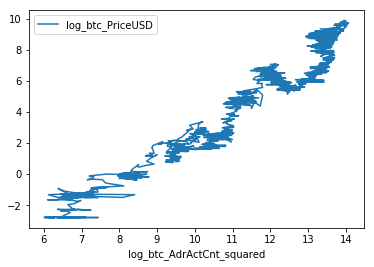

In [169]:
temp2 = temp[['log_btc_PriceUSD','log_btc_AdrActCnt_squared']]
temp2.plot(x='log_btc_AdrActCnt_squared', y='log_btc_PriceUSD');

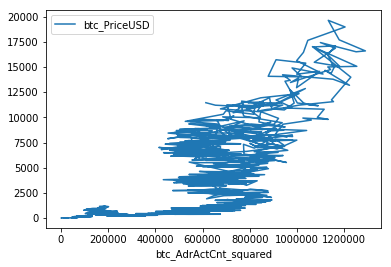

In [170]:
temp3 = temp[['btc_PriceUSD','btc_AdrActCnt_squared']]
temp3.plot(x='btc_AdrActCnt_squared', y='btc_PriceUSD');

In [156]:
del temp
del temp2
del temp3